# Histograms and Model Adjustments

In this section, we will delve deeper into how to visualize our data and extract quantitative information from it.

We will move from basic histograms to professional tools and perform a fit to measure the properties of the Z boson.

### 1. Preparing and Loading Test Data

First, we import the necessary libraries.

You will notice some new ones: skhep_testdata to obtain sample data files, and hist for histograms.

In [3]:
import sys
import site
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt

# Get the user site-packages path
user_site_packages = site.getusersitepackages()

# Check if it's already in sys.path to avoid adding duplicates
if user_site_packages not in sys.path:
    sys.path.insert(0, user_site_packages) 

print("Updated sys.path:")
for p in sys.path:
    print(f"  - {p}")

# Now importing
import skhep_testdata
print("skhep_testdata imported successfully!")

Updated sys.path:
  - /eos/user/w/wbuitrag/.local/lib/python3.11/site-packages
  - /eos/home-i01/w/wbuitrag/SWAN_projects/PocketCoffea
  - /cvmfs/sft.cern.ch/lcg/releases/condor/24.0.7-acbb2/x86_64-el9-gcc13-opt/lib/python3
  - /cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/itk
  - /cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/python
  - /cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib
  - 
  - /cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages
  - /usr/local/lib/swan/nb_term_lib
  - /cvmfs/sft.cern.ch/lcg/releases/Python/3.11.9-2924c/x86_64-el9-gcc13-opt/lib/python311.zip
  - /cvmfs/sft.cern.ch/lcg/releases/Python/3.11.9-2924c/x86_64-el9-gcc13-opt/lib/python3.11
  - /cvmfs/sft.cern.ch/lcg/releases/Python/3.11.9-2924c/x86_64-el9-gcc13-opt/lib/python3.11/lib-dynload
  - /cvmfs/sft.cern.ch/lcg/releases/Python/3.11.9-2924c/x86_64-el9-gcc13-opt/lib/python3.11/site-packag

### 2. From Basic to Professional Histograms

There are quick ways to visualize data. numpy can calculate the contents of a histogram, and matplotlib can draw it directly.

In [5]:
tree = uproot.open(skhep_testdata.data_path("uproot-Zmumu.root"))["events"]

In [6]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Type                 | char*                    | AsStrings()
Run                  | int32_t                  | AsDtype('>i4')
Event                | int32_t                  | AsDtype('>i4')
E1                   | double                   | AsDtype('>f8')
px1                  | double                   | AsDtype('>f8')
py1                  | double                   | AsDtype('>f8')
pz1                  | double                   | AsDtype('>f8')
pt1                  | double                   | AsDtype('>f8')
eta1                 | double                   | AsDtype('>f8')
phi1                 | double                   | AsDtype('>f8')
Q1                   | int32_t                  | AsDtype('>i4')
E2                   | double                   | AsDtype('>f8')
px2                  | double                   | AsDtype('>f

In [7]:
np.histogram(tree["M"].array())

<Array [[172, 89, 29, 69, 277, ..., 24, 0, 2, 2], ...] type='2 * var * float64'>

(array([ 172.,   89.,   29.,   69.,  277., 1640.,   24.,    0.,    2.,
           2.]),
 array([  0.38905792,  17.56032889,  34.73159987,  51.90287084,
         69.07414181,  86.24541279, 103.41668376, 120.58795473,
        137.75922571, 154.93049668, 172.10176766]),
 <BarContainer object of 10 artists>)

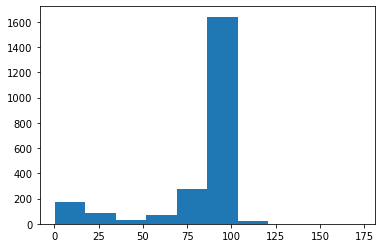

In [8]:
plt.hist(tree["M"].array())

These methods are useful, but limited. For serious analysis, we need a histogram object that we can work with.

The hist library (based on boost-histogram in C++) is the standard tool in the scientific Python ecosystem for creating, manipulating, and visualizing histograms.

### 3. Boost-histogram and hist

The main feature that these functions lack (without some effort) is refillability. High-energy physicists usually want to fill histograms with more data than can fit in memory, which means setting bin intervals on an empty container and filling it in batches (sequentially or in parallel).

Boost-histogram is a library designed for that purpose. It is intended as an infrastructure component. You can explore its “low-level” functionality upon importing it:

In [10]:
import boost_histogram as bh
import hist

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7c0cbd17d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

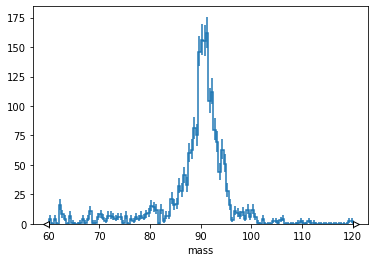

In [11]:
h = hist.Hist(hist.axis.Regular(120, 60, 120, name="mass"))

h.fill(tree["M"].array())

h.plot()

The big advantage is that h is not just a drawing, it is a data object.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7b6cbc6ed0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

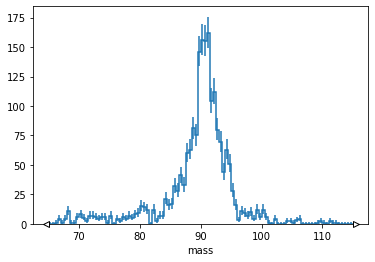

In [12]:
h[10:110].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7b6cc529d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

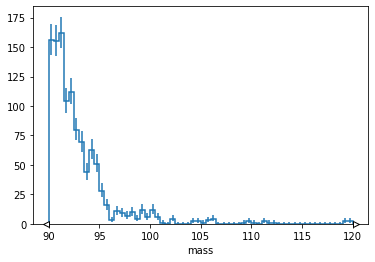

In [13]:
# explicit version
h[hist.loc(90) :].plot()

### 4. Histogram Manipulation: Slicing and Rebinning

hist supports a very powerful syntax called UHI (Unified Histogram Indexing) for selecting and manipulating data.

Slicing by value, we can select ranges from the histogram using the axis values, not just the bin indices.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7b6cae2590>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

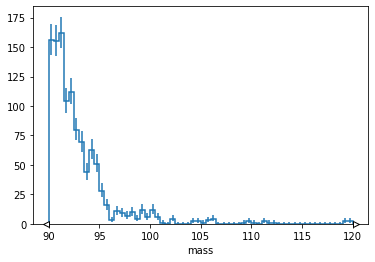

In [14]:
# short version

h[90j:].plot()

Rebin by a factor

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7b6ce3a4d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

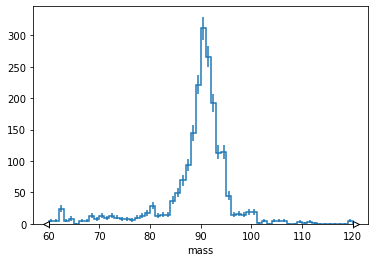

In [15]:
# Explicit version

h[:: hist.rebin(2)].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7b6c8a4650>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

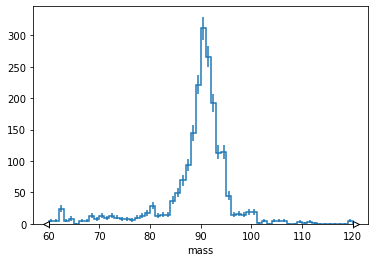

In [17]:
# Short version

h[::2j].plot()

Sum over a range.

In [18]:
# Explicit Version

h[hist.loc(90) : hist.loc(100) : sum]

1102.0

In [19]:
# Short Version

h[90j:100j:sum]

1102.0

Things get more interesting when a histogram has multiple dimensions.

### 5. Multidimensional Histograms

hist really shines with data from more than one dimension.

Creating a 3D histogram: Let's make a histogram of the position of the primary vertex (x, y, z) of the collision.


In [20]:
import hist

In [21]:
picodst = uproot.open("https://pivarski-princeton.s3.amazonaws.com/pythia_ppZee_run17emb.picoDst.root:PicoDst")

In [22]:
picodst.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | int32_t                  | AsDtype('>i4')
Event/Event.mRunId   | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.mEventId | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.mFillId  | uint16_t[]               | AsJagged(AsDtype('>u2'))
Event/Event.mBField  | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.mTime    | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.mPrim... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.mPrim... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.mPrim... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.mPrim... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.mPrim... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.mPrim... | 

In [23]:
vertexhist = hist.Hist(
    hist.axis.Regular(600, -1, 1, label="x"),
    hist.axis.Regular(600, -1, 1, label="y"),
    hist.axis.Regular(600, -1, 1, label="z"),

)

In [24]:
vertex_data = picodst.arrays(filter_name="*mPrimaryVertex[XYZ]")

In [25]:
vertexhist.fill(
    ak.flatten(vertex_data["Event.mPrimaryVertexX"]),
    ak.flatten(vertex_data["Event.mPrimaryVertexY"]),
    ak.flatten(vertex_data["Event.mPrimaryVertexZ"]),
)

Hist(
  Regular(600, -1, 1, label='x'),
  Regular(600, -1, 1, label='y'),
  Regular(600, -1, 1, label='z'),
  storage=Double()) # Sum: 141.0 (8004.0 with flow)

The most common operation with multidimensional histograms is projection: collapsing one or more dimensions to view the others.

(ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f7b036cf290>, cbar=None, text=[]),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7b039d0090>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7b038b3c50>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

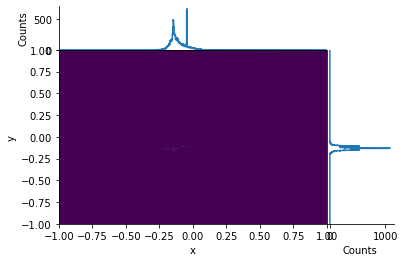

In [28]:
vertexhist[:, :, sum].plot2d_full()

(ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f7b0349bc90>, cbar=None, text=[]),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7b034b0190>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7b035b2f90>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

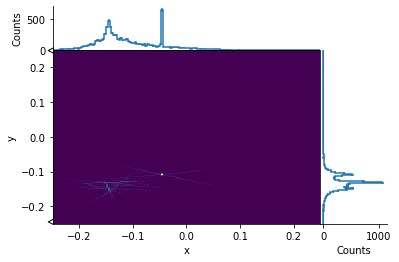

In [29]:
vertexhist[-0.25j:0.25j, -0.25j:0.25j, sum].plot2d_full()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7b0338a590>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

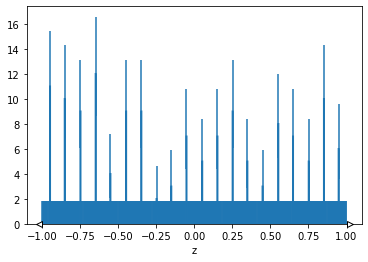

In [30]:
vertexhist[sum, sum, :].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7b032e62d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

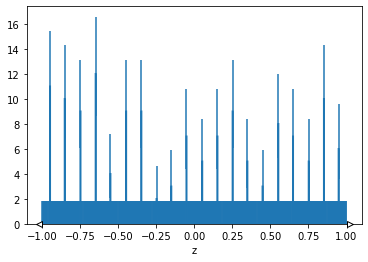

In [31]:
vertexhist[-0.25j:0.25j:sum, -0.25j:0.25j:sum, :].plot()

### 6. Model Fitting with iminuit and zfit

Now that we have a clean histogram of the Z peak, we can fit a mathematical function to it to extract its properties, such as its mass ($\mu$) and width ($\Gamma$).

Option 1: iminuit

iminuit is the Python interface to MINUIT, the historical standard in particle physics for error minimization and fitting.

In [37]:
import iminuit.cost

In [38]:
norm = len(h.axes[0].widths) / (h.axes[0].edges[-1] - h.axes[0].edges[0]) / h.sum()

/cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/numba/core/dispatcher.py:289: UserWarning: Numba extension module 'awkward.numba' failed to load due to 'AttributeError(module 'awkward.numba' has no attribute 'register')'.
  entrypoints.init_all()


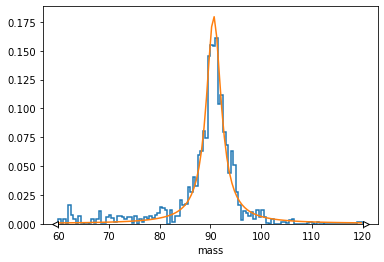

In [39]:
def f(x, background, mu, gamma):
    return (
        background
        + (1 - background) * gamma**2 / ((x - mu) ** 2 + gamma**2) / np.pi / gamma
    )


loss = iminuit.cost.LeastSquares(
    h.axes[0].centers, h.values() * norm, np.sqrt(h.variances()) * norm, f
)
loss.mask = h.variances() > 0

minimizer = iminuit.Minuit(loss, background=0, mu=91, gamma=4)

minimizer.migrad()
minimizer.hesse()

(h * norm).plot()
plt.plot(loss.x, f(loss.x, *minimizer.values))